In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
file_path = '/content/LDA_results.4.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

In [3]:
# Step 2: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
        LDA1      LDA2      LDA3      LDA4  label
0   1.921664 -2.674763  0.172239 -2.628960     12
1 -10.100228  4.409782  0.407498  0.368238     15
2   5.899996  1.645313  1.683837  1.771158     17
3   0.811099 -0.890581 -1.683839 -5.819650      4
4   8.778212  9.201870 -7.135024 -3.891139     14


In [4]:
# Step 3: Check for missing values
if data.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with mean values...")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values detected.")

# Step 4: Separate features and labels
if 'label' in data.columns:
    features = data.drop(columns=['label'])  # Dropping the label column
    labels = data['label']
    print("Features and labels separated successfully.")
else:
    raise KeyError("'label' column not found in the dataset. Please ensure the dataset contains a 'label' column.")

No missing values detected.
Features and labels separated successfully.


In [5]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (112, 4)
Testing set size: (28, 4)


In [7]:
# Step 6: Initialize the SVM model
kernel_type = 'linear'  # Options: 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel=kernel_type, random_state=42)
print(f"Initialized SVM with '{kernel_type}' kernel.")

Initialized SVM with 'linear' kernel.


In [8]:
# Step 7: Train the SVM model
svm_model.fit(X_train, y_train)
print("SVM model trained successfully.")

SVM model trained successfully.


In [9]:
# Step 8: Make predictions on the test set
y_pred = svm_model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [10]:
# Step 9: Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Model Accuracy: {accuracy:.2f}")


SVM Model Accuracy: 0.79


In [11]:
# Step 10: Display the classification report
print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred))


Classification Report for SVM:
              precision    recall  f1-score   support

           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.80      1.00      0.89         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1
          16       0.75      1.00      0.86         3
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


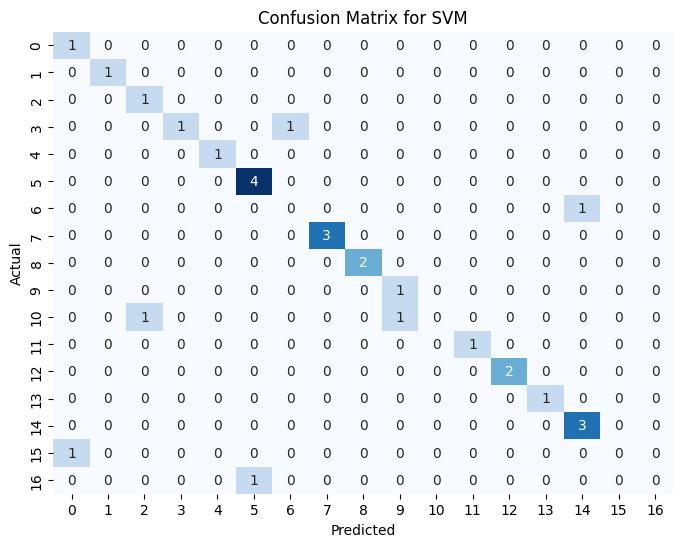

In [12]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
# Step 12: Hyperparameter Tuning (Optional)
# Experiment with different kernel types and C values
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
best_accuracy = 0
best_params = {}

print("\nTuning SVM hyperparameters...")
for kernel in kernel_options:
    for C in C_values:
        temp_model = SVC(kernel=kernel, C=C, random_state=42)
        temp_model.fit(X_train, y_train)
        temp_pred = temp_model.predict(X_test)
        temp_accuracy = accuracy_score(y_test, temp_pred)
        print(f"Kernel: {kernel}, C: {C}, Accuracy: {temp_accuracy:.2f}")
        if temp_accuracy > best_accuracy:
            best_accuracy = temp_accuracy
            best_params = {'kernel': kernel, 'C': C}

print(f"\nBest Parameters: {best_params}, Best Accuracy: {best_accuracy:.2f}")


Tuning SVM hyperparameters...
Kernel: linear, C: 0.1, Accuracy: 0.82
Kernel: linear, C: 1, Accuracy: 0.79
Kernel: linear, C: 10, Accuracy: 0.79
Kernel: poly, C: 0.1, Accuracy: 0.32
Kernel: poly, C: 1, Accuracy: 0.57
Kernel: poly, C: 10, Accuracy: 0.75
Kernel: rbf, C: 0.1, Accuracy: 0.29
Kernel: rbf, C: 1, Accuracy: 0.68
Kernel: rbf, C: 10, Accuracy: 0.86
Kernel: sigmoid, C: 0.1, Accuracy: 0.29
Kernel: sigmoid, C: 1, Accuracy: 0.46
Kernel: sigmoid, C: 10, Accuracy: 0.64

Best Parameters: {'kernel': 'rbf', 'C': 10}, Best Accuracy: 0.86
